# Lecture 15: Sampling

In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

## Probability: Calculation vs Simulation

Roll a six-sided die 20 times. What's P(at least one 6)?

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

### Calculation

In [2]:
1 - (5/6) ** 20

0.9739159466954111

In [3]:
rolls = np.arange(1, 51, 1)
at_least_one = Table().with_columns(
    'Rolls', rolls,
    'Chance of at least one 6', 1 - (5/6)**rolls
)
at_least_one.set_format(1, PercentFormatter(3))

Rolls,Chance of at least one 6
1,16.667%
2,30.556%
3,42.130%
4,51.775%
5,59.812%
6,66.510%
7,72.092%
8,76.743%
9,80.619%
10,83.849%


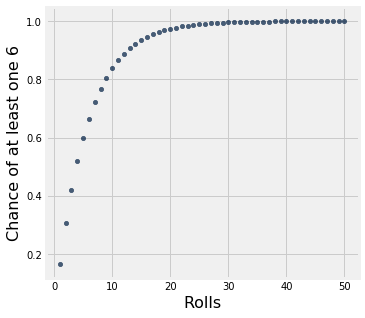

In [4]:
at_least_one.scatter('Rolls')

In [5]:
at_least_one.where('Rolls', 20)

Rolls,Chance of at least one 6
20,97.392%


### Simulation

How many of the following return a random number from 1 to 6 (inclusive), with each number equally likely?

- `np.random.choice(np.arange(6))`  
- `np.random.choice(np.arange(6)+1)`  
- `np.random.choice(np.arange(1,6+1))`  
- `np.random.choice(np.arange(1,3+1))` + `np.random.choice(np.arange(1,3+1))`

A. 0  
B. 1  
C. 2  
D. 3  
E. 4  

<br/><br/><br/><br/><br/><br/>

In [6]:
rolls = np.random.choice(np.arange(1,6+1), 20)
rolls

array([2, 1, 4, 1, 5, 6, 5, 6, 6, 1, 5, 1, 5, 1, 6, 3, 6, 3, 1, 4])

In [7]:
sum(rolls==6)>0

True

In [8]:
# at least one 6?
sum(rolls==6) > 0

True

In [9]:
# Simulate that experiment many times

trials = 10000
successes = 0  # success means at least one 6

for i in np.arange(trials):
    rolls = np.random.choice(np.arange(1,6+1), 20)
    if sum(rolls==6) > 0:
        successes = successes + 1

successes/trials

0.9729

## Sampling

In [10]:
top = Table.read_table('top_movies.csv')
top = top.with_column('Row Index', np.arange(top.num_rows)).move_to_start('Row Index')
top

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
0,Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
1,Avatar,Fox,760507625,846120800,2009
2,Titanic,Paramount,658672302,1178627900,1997
3,Jurassic World,Universal,652270625,687728000,2015
4,Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
5,The Dark Knight,Warner Bros.,534858444,647761600,2008
6,Star Wars: Episode I - The Phantom Menace,Fox,474544677,785715000,1999
7,Star Wars,Fox,460998007,1549640500,1977
8,Avengers: Age of Ultron,Buena Vista (Disney),459005868,465684200,2015
9,The Dark Knight Rises,Warner Bros.,448139099,500961700,2012


### Deterministic sampling

In [11]:
top.take([3, 5, 7])

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
3,Jurassic World,Universal,652270625,687728000,2015
5,The Dark Knight,Warner Bros.,534858444,647761600,2008
7,Star Wars,Fox,460998007,1549640500,1977


In [12]:
top.where('Title', are.containing('and the'))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
22,Harry Potter and the Deathly Hallows Part 2,Warner Bros.,381011219,417512200,2011
43,Harry Potter and the Sorcerer's Stone,Warner Bros.,317575550,486442900,2001
44,Indiana Jones and the Kingdom of the Crystal Skull,Paramount,317101119,384231200,2008
54,Harry Potter and the Half-Blood Prince,Warner Bros.,301959197,352098800,2009
59,Harry Potter and the Order of the Phoenix,Warner Bros.,292004738,369250200,2007
60,"The Chronicles of Narnia: The Lion, the Witch and the Wa ...",Buena Vista (Disney),291710957,393033100,2005
62,Harry Potter and the Goblet of Fire,Warner Bros.,290013036,393024800,2005
69,Harry Potter and the Chamber of Secrets,Warner Bros.,261988482,390768100,2002
76,Harry Potter and the Prisoner of Azkaban,Warner Bros.,249541069,349598600,2004
91,Beauty and the Beast,Buena Vista (Disney),218967620,394664300,1991


### Probabilistic (random) sampling

In [13]:
start = np.random.choice(np.arange(10))
top.take(np.arange(start, start+5))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
5,The Dark Knight,Warner Bros.,534858444,647761600,2008
6,Star Wars: Episode I - The Phantom Menace,Fox,474544677,785715000,1999
7,Star Wars,Fox,460998007,1549640500,1977
8,Avengers: Age of Ultron,Buena Vista (Disney),459005868,465684200,2015
9,The Dark Knight Rises,Warner Bros.,448139099,500961700,2012


In [14]:
indices = np.arange(1, top.num_rows+1)
indices

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [15]:
random_indices = np.random.choice(indices, 5)
random_indices

array([ 34,  13,  57, 197,  34])

In [16]:
top.take(random_indices)

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
34,The Hunger Games: Mockingjay - Part 1,Lionsgate,337135885,354324000,2014
13,Pirates of the Caribbean: Dead Man's Chest,Buena Vista (Disney),423315812,562266800,2006
57,The Sixth Sense,Buena Vista (Disney),293506292,500938400,1999
197,Duel in the Sun,Selz.,20408163,443877500,1946
34,The Hunger Games: Mockingjay - Part 1,Lionsgate,337135885,354324000,2014


In [17]:
top.sample(1)

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
166,Pinocchio,Disney,84254167,586409000,1940


In [18]:
top.take(np.arange(5)).sample(5, with_replacement=False)

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
2,Titanic,Paramount,658672302,1178627900,1997
0,Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
3,Jurassic World,Universal,652270625,687728000,2015
1,Avatar,Fox,760507625,846120800,2009
4,Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012


In [19]:
top.take(np.arange(5)).sample(5, with_replacement=True)

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
0,Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
4,Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
4,Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
0,Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
0,Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015


## Sampling from dice

In [20]:
d6 = Table().with_column('face', np.arange(1,6+1))
d6

face
1
2
3
4
5
6


In [21]:
def face_hist(t):
    """
    Draw a histogram of the number of times each face (1-6) 
    occurs in table t.
    """
    t.hist('face', bins=np.arange(0.5, 7, 1), unit='face')
    plots.xlabel('Face')

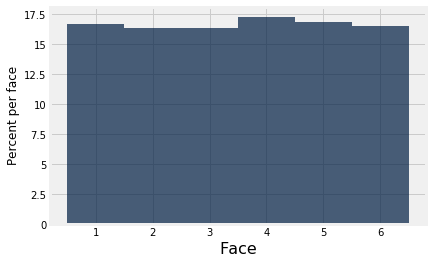

In [22]:
face_hist(d6.sample(10000))  # 100, 1_000, 10_000, 100_000

**Discussion question:** What do you expect to happen to the histogram as the sample size increases?

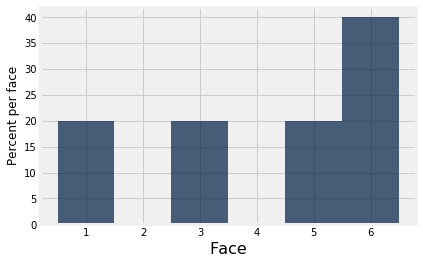

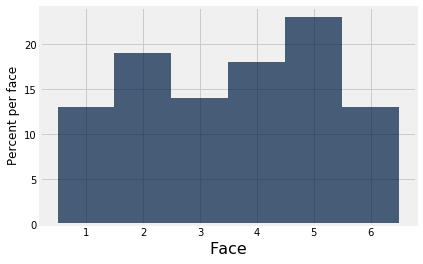

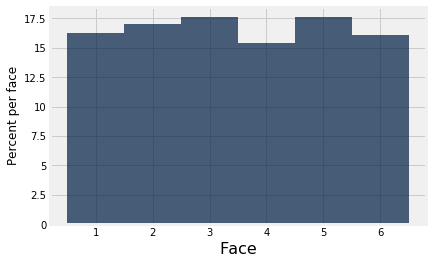

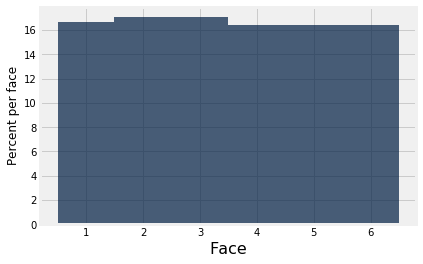

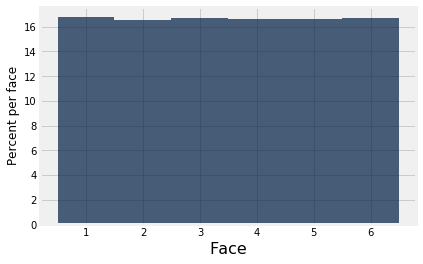

In [23]:
for i in np.arange(1,5+1):
    face_hist(d6.sample(10 ** i))

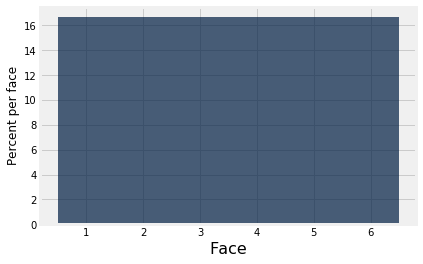

In [24]:
# With larger samples, getting closer and closer to:
face_hist(d6)

## Sampling flights

In [25]:
united = Table.read_table('united.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


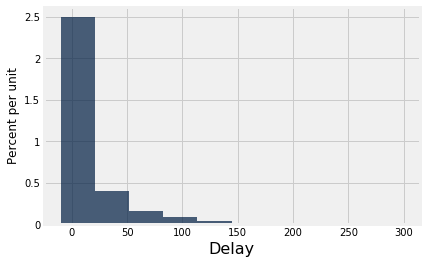

In [26]:
# Who knows the probability distribution?
# But let's take that table as the population.
united.hist('Delay')

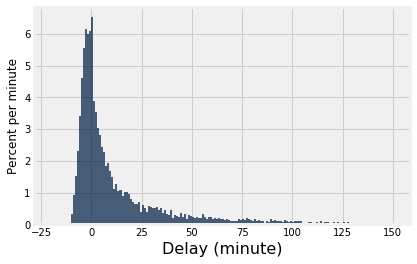

In [27]:
def delay_hist(t):
    t.hist('Delay', unit='minute', bins=np.arange(-20, 151, 1))
    
delay_hist(united)

In [28]:
# Most delays between 1 and 20 min
between1and20 = united.where('Delay', are.between(1, 20)).num_rows
num_delays = united.where('Delay', are.above(0)).num_rows
between1and20 / num_delays

0.5882877148313176

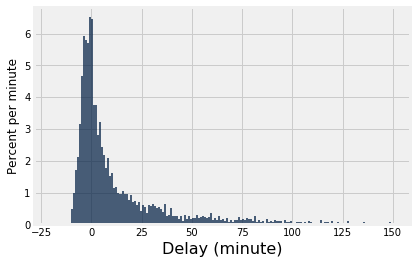

In [29]:
# Empirical distribution of a random sample
# looks like probability distribution, and more
# so as sample size increases
s = united.sample(10000)
delay_hist(s)

In [30]:
# Most delays between 1 and 20 min
between1and20 = s.where('Delay', are.between(1, 20)).num_rows
num_delays = s.where('Delay', are.above(0)).num_rows
between1and20 / num_delays

0.5844110450891297